- Name: 
- Student ID: 

**Put a cross "x" in the checkbox**
- [ ] *Honor Pledge: I certify that this exam is taken by the person named and done without any form of assistance from other students and/or persons.* 
 




**Problem 1 (6 tasks) (35 pts)**

In [1]:
# Setup code
import pandas as pd
pd.options.display.max_rows = 21

Task 1:

In [2]:
# Write down your code for task 1
transactions = pd.read_csv("transactions.csv")
transactions.reset_index(inplace=True)
transactions.columns = ["transID", "products"]
transactions




,transID,products
0,0,FRO11987 ELE17451 ELE89019 SNA90258 GRO99222
1,1,GRO99222 GRO12298 FRO12685 ELE91550 SNA11465 E...
2,2,ELE17451 GRO73461 DAI22896 SNA99873 FRO86643
3,3,ELE17451 ELE37798 FRO86643 GRO56989 ELE23393 S...
4,4,ELE17451 SNA69641 FRO86643 FRO78087 SNA11465 G...
...,...,...
31096,31096,SNA30755 ELE97341 DAI42493 ELE74009 DAI22896 G...
31097,31097,DAI87693 DAI35347 FRO31317 GRO21037 GRO88505 F...
31098,31098,FRO53271 ELE53126 FRO31317 DAI83948 GRO88511 G...
31099,31099,FRO41319 ELE14480 SNA62128 ELE92920 FRO99756 E...


The layout of `transactions` should look like the following:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>transID</th>
      <th>products</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>FRO11987 ELE17451 ELE89019 SNA90258 GRO99222</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>GRO99222 GRO12298 FRO12685 ELE91550 SNA11465 E...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>ELE17451 GRO73461 DAI22896 SNA99873 FRO86643</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>ELE17451 ELE37798 FRO86643 GRO56989 ELE23393 S...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>ELE17451 SNA69641 FRO86643 FRO78087 SNA11465 G...</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>31096</th>
      <td>31096</td>
      <td>SNA30755 ELE97341 DAI42493 ELE74009 DAI22896 G...</td>
    </tr>
    <tr>
      <th>31097</th>
      <td>31097</td>
      <td>DAI87693 DAI35347 FRO31317 GRO21037 GRO88505 F...</td>
    </tr>
    <tr>
      <th>31098</th>
      <td>31098</td>
      <td>FRO53271 ELE53126 FRO31317 DAI83948 GRO88511 G...</td>
    </tr>
    <tr>
      <th>31099</th>
      <td>31099</td>
      <td>FRO41319 ELE14480 SNA62128 ELE92920 FRO99756 E...</td>
    </tr>
    <tr>
      <th>31100</th>
      <td>31100</td>
      <td>DAI45339 SNA59903 DAI62779 DAI92600 DAI42083 G...</td>
    </tr>
  </tbody>
</table>
<p>31101 rows × 2 columns</p>
</div>

<hr>

Values in the `products` column each are a space-delimited list of product IDs. So each record in `transactions` stores all product items that were purchased in a transaction. 

Please run the following code to transform `transactions` into a tabular form in whch each row associates every product item with the transaction where it was purchased. Name the new `DataFrame` `product_trans`:

In [3]:
product_trans = pd.DataFrame(transactions['products'].str.split(' ').tolist(), 
                            index=transactions['transID']).stack().reset_index()[['transID', 0]]
product_trans.columns = ['transID', 'item']; 
product_trans = product_trans.loc[product_trans['item']!='', :]
product_trans

,transID,item
0,0,FRO11987
1,0,ELE17451
2,0,ELE89019
3,0,SNA90258
4,0,GRO99222
...,...,...
411919,31100,DAI62779
411920,31100,DAI92600
411921,31100,DAI42083
411922,31100,GRO59710


For example, the 1st record

|transID|item 
|:--|:--: |  
|0| FRO11987 |   | 
| ... | ...| 
 

means `FRO11987` was purchased in transaction `0`. `FRO11987` could also be purchased in other transactions and thereby occupies multiple rows in `product_trans`. The same applies to other distinct products in `product_trans`.
<hr>

Task 2:

In [4]:
# Write down your code for task 2
# Hint: use the filter method of groupby objects
product_trans_grby = product_trans.groupby("item")
product_trans = product_trans_grby.filter(lambda x: x["item"].count() > 1000).reset_index(drop=True)
product_trans



,transID,item
0,0,ELE17451
1,1,ELE26917
2,1,ELE17451
3,2,ELE17451
4,2,GRO73461
...,...,...
108051,31099,ELE56788
108052,31099,DAI22177
108053,31099,DAI62779
108054,31100,DAI62779


The layout of `product_trans` after removing non-frequently purchased products should look like the following:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>transID</th>
      <th>item</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>ELE17451</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>ELE26917</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>ELE17451</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2</td>
      <td>ELE17451</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>GRO73461</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>108051</th>
      <td>31099</td>
      <td>ELE56788</td>
    </tr>
    <tr>
      <th>108052</th>
      <td>31099</td>
      <td>DAI22177</td>
    </tr>
    <tr>
      <th>108053</th>
      <td>31099</td>
      <td>DAI62779</td>
    </tr>
    <tr>
      <th>108054</th>
      <td>31100</td>
      <td>DAI62779</td>
    </tr>
    <tr>
      <th>108055</th>
      <td>31100</td>
      <td>GRO59710</td>
    </tr>
  </tbody>
</table>
<p>108056 rows × 2 columns</p>
</div>
<hr>


 
Task 3:

In [5]:
# Write down your code for task 3
# Your code should not modify the content of product_trans
print("{} distinct products are left and thereby considered as frequently purchased products".format(len(set(product_trans["item"]))))




60 distinct products are left and thereby considered as frequently purchased products


<hr>
 
Please run the following code to merge `product_trans` with itself to create an auxiliary `DataFrame` named `product_pairs`. It contains all pairs of products that were purchased together across all transaction.

In [6]:
product_pairs = pd.merge(product_trans, product_trans, on='transID', sort=True)
product_pairs

,transID,item_x,item_y
0,0,ELE17451,ELE17451
1,1,ELE26917,ELE26917
2,1,ELE26917,ELE17451
3,1,ELE17451,ELE26917
4,1,ELE17451,ELE17451
...,...,...,...
563483,31099,DAI62779,DAI62779
563484,31100,DAI62779,DAI62779
563485,31100,DAI62779,GRO59710
563486,31100,GRO59710,DAI62779


<hr>
Task 4:

In [7]:
# Write down your code for task 4
# Hint: use the indexer attribute loc to take a lambda expression that expresses the needed filtering rule
product_pairs = product_pairs.loc[lambda x: product_pairs["item_x"]!=product_pairs["item_y"]].reset_index(drop=True)
product_pairs



,transID,item_x,item_y
0,1,ELE26917,ELE17451
1,1,ELE17451,ELE26917
2,2,ELE17451,GRO73461
3,2,ELE17451,DAI22896
4,2,ELE17451,SNA99873
...,...,...,...
455427,31099,DAI62779,ELE74009
455428,31099,DAI62779,ELE56788
455429,31099,DAI62779,DAI22177
455430,31100,DAI62779,GRO59710




The output should look like:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>transID</th>
      <th>item_x</th>
      <th>item_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>ELE26917</td>
      <td>ELE17451</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>ELE17451</td>
      <td>ELE26917</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>ELE17451</td>
      <td>GRO73461</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2</td>
      <td>ELE17451</td>
      <td>DAI22896</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>ELE17451</td>
      <td>SNA99873</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>455427</th>
      <td>31099</td>
      <td>DAI62779</td>
      <td>ELE74009</td>
    </tr>
    <tr>
      <th>455428</th>
      <td>31099</td>
      <td>DAI62779</td>
      <td>ELE56788</td>
    </tr>
    <tr>
      <th>455429</th>
      <td>31099</td>
      <td>DAI62779</td>
      <td>DAI22177</td>
    </tr>
    <tr>
      <th>455430</th>
      <td>31100</td>
      <td>DAI62779</td>
      <td>GRO59710</td>
    </tr>
    <tr>
      <th>455431</th>
      <td>31100</td>
      <td>GRO59710</td>
      <td>DAI62779</td>
    </tr>
  </tbody>
</table>
<p>455432 rows × 3 columns</p>
</div>

<hr>
Task 5:

In [8]:
# Write down your code for task 5
product_pairs_grby = product_pairs.groupby(by=["item_x","item_y"])
# for key,group in product_pairs_grby:
#     print(key)
#     print(group)
copurchase = product_pairs_grby.agg([("count", lambda x:x.count())]).reset_index()
copurchase.columns = ["item_x", "item_y", "count"]
copurchase





,item_x,item_y,count
0,DAI22177,DAI22896,79
1,DAI22177,DAI31081,127
2,DAI22177,DAI35347,69
3,DAI22177,DAI42493,49
4,DAI22177,DAI43223,71
...,...,...,...
3535,SNA99873,SNA72163,70
3536,SNA99873,SNA80324,163
3537,SNA99873,SNA90094,99
3538,SNA99873,SNA93860,105


The layout of `copurchase` should look like the following:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>item_x</th>
      <th>item_y</th>
      <th>count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>DAI22177</td>
      <td>DAI22896</td>
      <td>79</td>
    </tr>
    <tr>
      <th>1</th>
      <td>DAI22177</td>
      <td>DAI31081</td>
      <td>127</td>
    </tr>
    <tr>
      <th>2</th>
      <td>DAI22177</td>
      <td>DAI35347</td>
      <td>69</td>
    </tr>
    <tr>
      <th>3</th>
      <td>DAI22177</td>
      <td>DAI42493</td>
      <td>49</td>
    </tr>
    <tr>
      <th>4</th>
      <td>DAI22177</td>
      <td>DAI43223</td>
      <td>71</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>3535</th>
      <td>SNA99873</td>
      <td>SNA72163</td>
      <td>70</td>
    </tr>
    <tr>
      <th>3536</th>
      <td>SNA99873</td>
      <td>SNA80324</td>
      <td>163</td>
    </tr>
    <tr>
      <th>3537</th>
      <td>SNA99873</td>
      <td>SNA90094</td>
      <td>99</td>
    </tr>
    <tr>
      <th>3538</th>
      <td>SNA99873</td>
      <td>SNA93860</td>
      <td>105</td>
    </tr>
    <tr>
      <th>3539</th>
      <td>SNA99873</td>
      <td>SNA96271</td>
      <td>94</td>
    </tr>
  </tbody>
</table>
<p>3540 rows × 3 columns</p>
</div>

Note that both representations for the same product pair are kept in `copurchase`. For example, the product pair involving `DAI22177` and `DAI22896` occupies two rows:

|item_x|item_y| count | 
|:--|:--: | :-- :| 
|DAI22177| DAI22896 |  79 | 
|  | ...|  |
|DAI22896| DAI22177 |  79 |
|  | ...|  |


We've done this purposedly, because we'll need to make mutual recommendation in task 4. 



<hr>

Task 6:



In [9]:
# Write down your code for task 6
copurchase_grby = copurchase.groupby("item_x",)
copurchase_grby.apply(lambda x:x.sort_values(by="count", ascending=False)[:3])
 
    


item_x    item_y  count
item_x                                  
DAI22177 5     DAI22177  DAI62779    382
         45    DAI22177  GRO73461    248
         13    DAI22177  ELE17451    203
DAI22896 104   DAI22896  GRO73461    304
         64    DAI22896  DAI62779    297
...                 ...       ...    ...
SNA96271 3472  SNA96271  SNA45677    269
         3452  SNA96271  FRO40251    227
SNA99873 3487  SNA99873  DAI62779    406
         3504  SNA99873  ELE74482    357
         3527  SNA99873  GRO73461    296

[180 rows x 3 columns]

The expected output is shown as follows:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>item_x</th>
      <th>item_y</th>
      <th>count</th>
    </tr>
    <tr>
      <th>item_x</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">DAI22177</th>
      <th>5</th>
      <td>DAI22177</td>
      <td>DAI62779</td>
      <td>382</td>
    </tr>
    <tr>
      <th>45</th>
      <td>DAI22177</td>
      <td>GRO73461</td>
      <td>248</td>
    </tr>
    <tr>
      <th>13</th>
      <td>DAI22177</td>
      <td>ELE17451</td>
      <td>203</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">DAI22896</th>
      <th>104</th>
      <td>DAI22896</td>
      <td>GRO73461</td>
      <td>304</td>
    </tr>
    <tr>
      <th>64</th>
      <td>DAI22896</td>
      <td>DAI62779</td>
      <td>297</td>
    </tr>
    <tr>
      <th>...</th>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">SNA96271</th>
      <th>3472</th>
      <td>SNA96271</td>
      <td>SNA45677</td>
      <td>269</td>
    </tr>
    <tr>
      <th>3452</th>
      <td>SNA96271</td>
      <td>FRO40251</td>
      <td>227</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">SNA99873</th>
      <th>3487</th>
      <td>SNA99873</td>
      <td>DAI62779</td>
      <td>406</td>
    </tr>
    <tr>
      <th>3504</th>
      <td>SNA99873</td>
      <td>ELE74482</td>
      <td>357</td>
    </tr>
    <tr>
      <th>3527</th>
      <td>SNA99873</td>
      <td>GRO73461</td>
      <td>296</td>
    </tr>
  </tbody>
</table>
<p>180 rows × 3 columns</p>
</div>

<hr>

**Problem 2 (5 tasks) (35 pts)**  

Task 1:

In [10]:
# Write down your code for task 1
# Hint: you may need to use a DataFrame's set_index() method
feature1 = pd.read_csv("feature1.csv")
feature2 = pd.read_csv("feature2.csv")
target = pd.read_csv("target.csv")
features = pd.concat([feature1, feature2["feature2_sub1"], feature2["feature2_sub2"], feature2["feature2_sub3"], target["target"]],axis=1)
features.set_index("id")

,feature1_sub1,feature1_sub2,feature1_sub3,feature2_sub1,feature2_sub2,feature2_sub3,target
id,,,,,,,
0,1001.0,153.40,2019.0,0.14710,0.01587,0.2654,0
1,1326.0,74.08,1956.0,0.07017,0.01340,0.1860,0
2,1203.0,94.03,1709.0,0.12790,0.02058,0.2430,0
3,386.1,27.23,567.7,0.10520,0.01867,0.2575,0
4,1297.0,94.44,1575.0,0.10430,0.01885,0.1625,0
...,...,...,...,...,...,...,...
564,1479.0,158.70,2027.0,0.13890,0.02454,0.2216,0
565,1261.0,99.04,1731.0,0.09791,0.01678,0.1628,0
566,858.1,48.55,1124.0,0.05302,0.01557,0.1418,0


The layout of `features` should look like the following:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>feature1_sub1</th>
      <th>feature1_sub2</th>
      <th>feature1_sub3</th>
      <th>feature2_sub1</th>
      <th>feature2_sub2</th>
      <th>feature2_sub3</th>
      <th>target</th>
    </tr>
    <tr>
      <th>id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1001.0</td>
      <td>153.40</td>
      <td>2019.0</td>
      <td>0.14710</td>
      <td>0.01587</td>
      <td>0.2654</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1326.0</td>
      <td>74.08</td>
      <td>1956.0</td>
      <td>0.07017</td>
      <td>0.01340</td>
      <td>0.1860</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1203.0</td>
      <td>94.03</td>
      <td>1709.0</td>
      <td>0.12790</td>
      <td>0.02058</td>
      <td>0.2430</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>386.1</td>
      <td>27.23</td>
      <td>567.7</td>
      <td>0.10520</td>
      <td>0.01867</td>
      <td>0.2575</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1297.0</td>
      <td>94.44</td>
      <td>1575.0</td>
      <td>0.10430</td>
      <td>0.01885</td>
      <td>0.1625</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>564</th>
      <td>1479.0</td>
      <td>158.70</td>
      <td>2027.0</td>
      <td>0.13890</td>
      <td>0.02454</td>
      <td>0.2216</td>
      <td>0</td>
    </tr>
    <tr>
      <th>565</th>
      <td>1261.0</td>
      <td>99.04</td>
      <td>1731.0</td>
      <td>0.09791</td>
      <td>0.01678</td>
      <td>0.1628</td>
      <td>0</td>
    </tr>
    <tr>
      <th>566</th>
      <td>858.1</td>
      <td>48.55</td>
      <td>1124.0</td>
      <td>0.05302</td>
      <td>0.01557</td>
      <td>0.1418</td>
      <td>0</td>
    </tr>
    <tr>
      <th>567</th>
      <td>1265.0</td>
      <td>86.22</td>
      <td>1821.0</td>
      <td>0.15200</td>
      <td>0.01664</td>
      <td>0.2650</td>
      <td>0</td>
    </tr>
    <tr>
      <th>568</th>
      <td>181.0</td>
      <td>19.15</td>
      <td>268.6</td>
      <td>0.00000</td>
      <td>0.00000</td>
      <td>0.0000</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
<p>569 rows × 7 columns</p>
</div>

<hr>
 
Task 2:

In [11]:
# Write down your code for task 2
features_l = features.melt(id_vars=["id","target"],var_name="feature")
features_l



,id,target,feature,value
0,0,0,feature1_sub1,1001.0000
1,1,0,feature1_sub1,1326.0000
2,2,0,feature1_sub1,1203.0000
3,3,0,feature1_sub1,386.1000
4,4,0,feature1_sub1,1297.0000
...,...,...,...,...
3409,564,0,feature2_sub3,0.2216
3410,565,0,feature2_sub3,0.1628
3411,566,0,feature2_sub3,0.1418
3412,567,0,feature2_sub3,0.2650


The layout of `features_l` should look like the following:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>target</th>
      <th>feature</th>
      <th>value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>feature1_sub1</td>
      <td>1001.0000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>0</td>
      <td>feature1_sub1</td>
      <td>1326.0000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>0</td>
      <td>feature1_sub1</td>
      <td>1203.0000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>0</td>
      <td>feature1_sub1</td>
      <td>386.1000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>0</td>
      <td>feature1_sub1</td>
      <td>1297.0000</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>3409</th>
      <td>564</td>
      <td>0</td>
      <td>feature2_sub3</td>
      <td>0.2216</td>
    </tr>
    <tr>
      <th>3410</th>
      <td>565</td>
      <td>0</td>
      <td>feature2_sub3</td>
      <td>0.1628</td>
    </tr>
    <tr>
      <th>3411</th>
      <td>566</td>
      <td>0</td>
      <td>feature2_sub3</td>
      <td>0.1418</td>
    </tr>
    <tr>
      <th>3412</th>
      <td>567</td>
      <td>0</td>
      <td>feature2_sub3</td>
      <td>0.2650</td>
    </tr>
    <tr>
      <th>3413</th>
      <td>568</td>
      <td>1</td>
      <td>feature2_sub3</td>
      <td>0.0000</td>
    </tr>
  </tbody>
</table>
<p>3414 rows × 4 columns</p>
</div>

<hr>
 
Task 3:




In [12]:
# Write down your code for task 3
features_l[["feature","sub"]] = features_l["feature"].str.split("_", expand=True)
features_l



,id,target,feature,value,sub
0,0,0,feature1,1001.0000,sub1
1,1,0,feature1,1326.0000,sub1
2,2,0,feature1,1203.0000,sub1
3,3,0,feature1,386.1000,sub1
4,4,0,feature1,1297.0000,sub1
...,...,...,...,...,...
3409,564,0,feature2,0.2216,sub3
3410,565,0,feature2,0.1628,sub3
3411,566,0,feature2,0.1418,sub3
3412,567,0,feature2,0.2650,sub3


The layout of `features_l` after you carry out the required division should look like the following:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>target</th>
      <th>feature</th>
      <th>sub</th>
      <th>value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>feature1</td>
      <td>sub1</td>
      <td>1001.0000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>0</td>
      <td>feature1</td>
      <td>sub1</td>
      <td>1326.0000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>0</td>
      <td>feature1</td>
      <td>sub1</td>
      <td>1203.0000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>0</td>
      <td>feature1</td>
      <td>sub1</td>
      <td>386.1000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>0</td>
      <td>feature1</td>
      <td>sub1</td>
      <td>1297.0000</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>3409</th>
      <td>564</td>
      <td>0</td>
      <td>feature2</td>
      <td>sub3</td>
      <td>0.2216</td>
    </tr>
    <tr>
      <th>3410</th>
      <td>565</td>
      <td>0</td>
      <td>feature2</td>
      <td>sub3</td>
      <td>0.1628</td>
    </tr>
    <tr>
      <th>3411</th>
      <td>566</td>
      <td>0</td>
      <td>feature2</td>
      <td>sub3</td>
      <td>0.1418</td>
    </tr>
    <tr>
      <th>3412</th>
      <td>567</td>
      <td>0</td>
      <td>feature2</td>
      <td>sub3</td>
      <td>0.2650</td>
    </tr>
    <tr>
      <th>3413</th>
      <td>568</td>
      <td>1</td>
      <td>feature2</td>
      <td>sub3</td>
      <td>0.0000</td>
    </tr>
  </tbody>
</table>
<p>3414 rows × 5 columns</p>
</div>

<hr>
 
Task 4:

Pull the values for the same-named sub features of an observation into two columns that represent corresponding main features as demonstrated below:

From 

|id|target| feature | sub | value 
|:--|:--: | :-- :| :-- :| :-- :| 
|0| 0 |  feature1 | sub1| 1001.0000
|  |  | ...|  |  | 
|0| 0 |  feature2 | sub1| 0.14710
|  |   | ...|  |  | 

to

|id|target | sub | feature1 | feature2
|:--|:--: | :-- :| :-- :| :-- :| 
|0| 0 |  sub1 |  1001.0000 | 0.14710
|  |  | ...|  |  | 
 


In [13]:
# Write down your code for task 4
features_w = features_l.pivot_table(index=["id","target","sub"], columns="feature").reset_index()
features_w.columns = ["id","target","sub","feature1","feature2"]
features_w.columns.name = "feature"
features_w



feature,id,target,sub,feature1,feature2
0,0,0,sub1,1001.00,0.14710
1,0,0,sub2,153.40,0.01587
2,0,0,sub3,2019.00,0.26540
3,1,0,sub1,1326.00,0.07017
4,1,0,sub2,74.08,0.01340
...,...,...,...,...,...
1702,567,0,sub2,86.22,0.01664
1703,567,0,sub3,1821.00,0.26500
1704,568,1,sub1,181.00,0.00000
1705,568,1,sub2,19.15,0.00000


The layout of `features_w` should look like the following:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>feature</th>
      <th>id</th>
      <th>target</th>
      <th>sub</th>
      <th>feature1</th>
      <th>feature2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>sub1</td>
      <td>1001.00</td>
      <td>0.14710</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>0</td>
      <td>sub2</td>
      <td>153.40</td>
      <td>0.01587</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0</td>
      <td>sub3</td>
      <td>2019.00</td>
      <td>0.26540</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>0</td>
      <td>sub1</td>
      <td>1326.00</td>
      <td>0.07017</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>0</td>
      <td>sub2</td>
      <td>74.08</td>
      <td>0.01340</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>1702</th>
      <td>567</td>
      <td>0</td>
      <td>sub2</td>
      <td>86.22</td>
      <td>0.01664</td>
    </tr>
    <tr>
      <th>1703</th>
      <td>567</td>
      <td>0</td>
      <td>sub3</td>
      <td>1821.00</td>
      <td>0.26500</td>
    </tr>
    <tr>
      <th>1704</th>
      <td>568</td>
      <td>1</td>
      <td>sub1</td>
      <td>181.00</td>
      <td>0.00000</td>
    </tr>
    <tr>
      <th>1705</th>
      <td>568</td>
      <td>1</td>
      <td>sub2</td>
      <td>19.15</td>
      <td>0.00000</td>
    </tr>
    <tr>
      <th>1706</th>
      <td>568</td>
      <td>1</td>
      <td>sub3</td>
      <td>268.60</td>
      <td>0.00000</td>
    </tr>
  </tbody>
</table>
<p>1707 rows × 5 columns</p>
</div>


<hr>
 
Task 5:

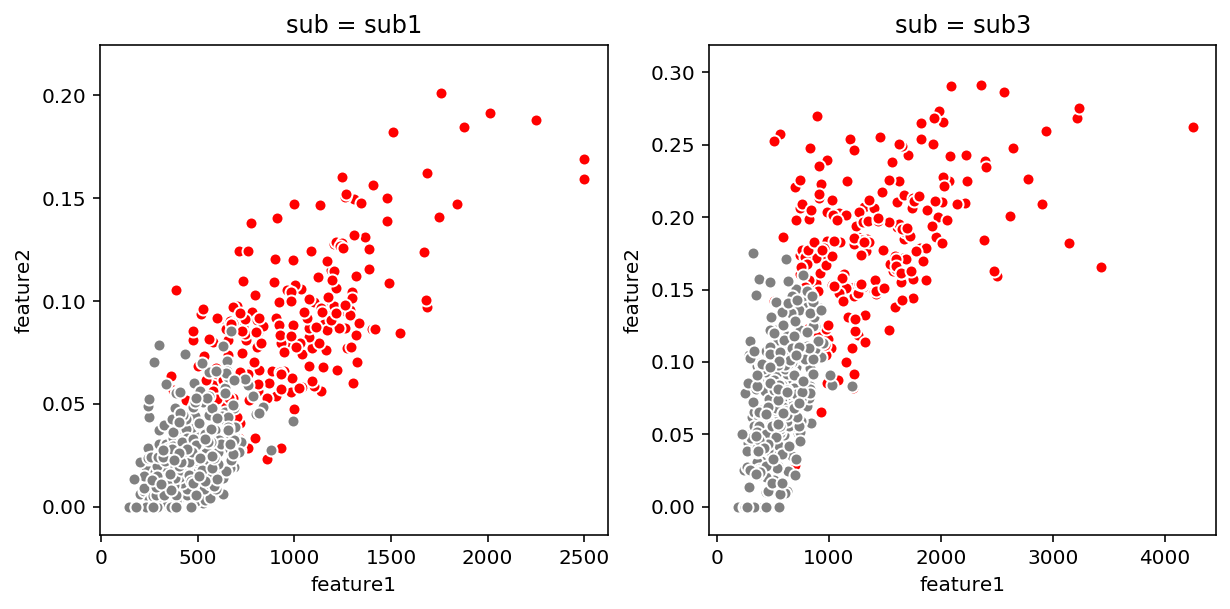

In [15]:
# setup code

from matplotlib import pyplot as plt 
import matplotlib as mpl

%config InlineBackend.figure_format="retina"

fig, ax = plt.subplots(1, 2, figsize=(10, 4.5))


# Write down your code for task 5
# Hint: 
# 1. You need to first create the proper subset for each subplot
# 2. You need to map values of the target column to markers' colors
# 3. Set the cmap option to "Set1" 
ax[0].scatter(features_w["feature1"][features_w["sub"]=="sub1"][features_w["target"]==0],features_w["feature2"][features_w["sub"]=="sub1"][features_w["target"]==0],cmap="Set1",edgecolor="w",color="r")
ax[1].scatter(features_w["feature1"][features_w["sub"]=="sub3"][features_w["target"]==0],features_w["feature2"][features_w["sub"]=="sub3"][features_w["target"]==0],cmap="Set1",edgecolor="w", color="r")
ax[0].scatter(features_w["feature1"][features_w["sub"]=="sub1"][features_w["target"]==1],features_w["feature2"][features_w["sub"]=="sub1"][features_w["target"]==1],cmap="Set1",edgecolor="w",color="gray")
ax[1].scatter(features_w["feature1"][features_w["sub"]=="sub3"][features_w["target"]==1],features_w["feature2"][features_w["sub"]=="sub3"][features_w["target"]==1],cmap="Set1",edgecolor="w", color="gray")
ax[0].set(title="sub = sub1",xlabel="feature1",ylabel="feature2")
ax[1].set(title="sub = sub3",xlabel="feature1",ylabel="feature2")

plt.show()












<hr>

**Problem 3 (4 tasks) (30 pts)**  

Task 1:

In [16]:
# setup code 

trans = {'T0': [2, 8, 3, 6, 1, 9], 'T1': [0, 5, 9], 'T2': [0, 9, 2], 'T3': [4, 7, 0, 5, 9], 
         'T4': [8, 3, 4, 1, 7, 6], 'T5': [1, 6, 3, 8], 'T6': [9, 0, 5], 'T7': [3, 8, 5, 0, 2],    
         'T8': [5, 7, 0, 8], 'T9': [3, 1, 4, 6, 7]}


# Write down your code for task 1
trans_sorted = {key:sorted(value) for key, value in trans.items()}
product_pairs = {key:[] for key,value in trans_sorted.items()}
for i in trans_sorted.keys():
    for j in range(len(trans_sorted[i])):
        for a in range(j+1, len(trans_sorted[i])):
            product_pairs[i].append((trans_sorted[i][j], trans_sorted[i][a]))
product_pairs



{'T0': [(1, 2),
  (1, 3),
  (1, 6),
  (1, 8),
  (1, 9),
  (2, 3),
  (2, 6),
  (2, 8),
  (2, 9),
  (3, 6),
  (3, 8),
  (3, 9),
  (6, 8),
  (6, 9),
  (8, 9)],
 'T1': [(0, 5), (0, 9), (5, 9)],
 'T2': [(0, 2), (0, 9), (2, 9)],
 'T3': [(0, 4),
  (0, 5),
  (0, 7),
  (0, 9),
  (4, 5),
  (4, 7),
  (4, 9),
  (5, 7),
  (5, 9),
  (7, 9)],
 'T4': [(1, 3),
  (1, 4),
  (1, 6),
  (1, 7),
  (1, 8),
  (3, 4),
  (3, 6),
  (3, 7),
  (3, 8),
  (4, 6),
  (4, 7),
  (4, 8),
  (6, 7),
  (6, 8),
  (7, 8)],
 'T5': [(1, 3), (1, 6), (1, 8), (3, 6), (3, 8), (6, 8)],
 'T6': [(0, 5), (0, 9), (5, 9)],
 'T7': [(0, 2),
  (0, 3),
  (0, 5),
  (0, 8),
  (2, 3),
  (2, 5),
  (2, 8),
  (3, 5),
  (3, 8),
  (5, 8)],
 'T8': [(0, 5), (0, 7), (0, 8), (5, 7), (5, 8), (7, 8)],
 'T9': [(1, 3),
  (1, 4),
  (1, 6),
  (1, 7),
  (3, 4),
  (3, 6),
  (3, 7),
  (4, 6),
  (4, 7),
  (6, 7)]}

The expected content of `product_pairs` is shown as follows:

```python
{'T0': [(1, 2), (1, 3), (1, 6), (1, 8), (1, 9), (2, 3), (2, 6), (2, 8), (2, 9), (3, 6), (3, 8), (3, 9), 
        (6, 8), (6, 9), (8, 9)], 
 'T1': [(0, 5), (0, 9), (5, 9)], 
 'T2': [(0, 2), (0, 9), (2, 9)], 
 'T3': [(0, 4), (0, 5), (0, 7), (0, 9), (4, 5), (4, 7), (4, 9), (5, 7), (5, 9), (7, 9)], 
 'T4': [(1, 3), (1, 4), (1, 6), (1, 7), (1, 8), (3, 4), (3, 6), (3, 7), (3, 8), (4, 6), (4, 7), (4, 8), 
        (6, 7), (6, 8), (7, 8)], 
 'T5': [(1, 3), (1, 6), (1, 8), (3, 6), (3, 8), (6, 8)], 
 'T6': [(0, 5), (0, 9), (5, 9)],
 'T7': [(0, 2), (0, 3), (0, 5), (0, 8), (2, 3), (2, 5), (2, 8), (3, 5), (3, 8), (5, 8)], 
 'T8': [(0, 5), (0, 7), (0, 8), (5, 7), (5, 8), (7, 8)], 
 'T9': [(1, 3), (1, 4), (1, 6), (1, 7), (3, 4), (3, 6), (3, 7), (4, 6), (4, 7), (6, 7)]
}
```

<hr>

 
Task 2: 

In [17]:
# Write down your code for task 2
list1 = [y for x in product_pairs.values() for y in x]
set1 = set(list1)
co_freq = {pair:list1.count(pair) for pair in set1}
co_freq = {pair:co_freq[pair] for pair in sorted(co_freq.keys(),key=lambda x:x)}
co_freq


{(0, 2): 2,
 (0, 3): 1,
 (0, 4): 1,
 (0, 5): 5,
 (0, 7): 2,
 (0, 8): 2,
 (0, 9): 4,
 (1, 2): 1,
 (1, 3): 4,
 (1, 4): 2,
 (1, 6): 4,
 (1, 7): 2,
 (1, 8): 3,
 (1, 9): 1,
 (2, 3): 2,
 (2, 5): 1,
 (2, 6): 1,
 (2, 8): 2,
 (2, 9): 2,
 (3, 4): 2,
 (3, 5): 1,
 (3, 6): 4,
 (3, 7): 2,
 (3, 8): 4,
 (3, 9): 1,
 (4, 5): 1,
 (4, 6): 2,
 (4, 7): 3,
 (4, 8): 1,
 (4, 9): 1,
 (5, 7): 2,
 (5, 8): 2,
 (5, 9): 3,
 (6, 7): 2,
 (6, 8): 3,
 (6, 9): 1,
 (7, 8): 2,
 (7, 9): 1,
 (8, 9): 1}

The content of `co_freq` is shown as follows (if you don't get the output sorted by key in order, 2 points will be deducted):
```python
{(0, 2): 2, (0, 3): 1, (0, 4): 1, (0, 5): 5, (0, 7): 2, (0, 8): 2, (0, 9): 4, 
 (1, 2): 1, (1, 3): 4, (1, 4): 2, (1, 6): 4, (1, 7): 2, (1, 8): 3, (1, 9): 1, 
 (2, 3): 2, (2, 5): 1, (2, 6): 1, (2, 8): 2, (2, 9): 2, 
 (3, 4): 2, (3, 5): 1, (3, 6): 4, (3, 7): 2, (3, 8): 4, (3, 9): 1, 
 (4, 5): 1, (4, 6): 2, (4, 7): 3, (4, 8): 1, (4, 9): 1, 
 (5, 7): 2, (5, 8): 2, (5, 9): 3,
 (6, 7): 2, (6, 8): 3, (6, 9): 1, 
 (7, 8): 2, (7, 9): 1, 
 (8, 9): 1}
```

<hr>
Task 3: 

In [18]:
# Write down your code for task 3
recommend = {i:[] for i in range(10)}
for i in range(10):
    for pair, occurance in co_freq.items():
        left, right = pair
        if left==i:
            recommend[i].append((right,occurance))
        if right==i:
            recommend[i].append((left,occurance))
recommend = {key: sorted(value) for key, value in recommend.items()}
recommend


{0: [(2, 2), (3, 1), (4, 1), (5, 5), (7, 2), (8, 2), (9, 4)],
 1: [(2, 1), (3, 4), (4, 2), (6, 4), (7, 2), (8, 3), (9, 1)],
 2: [(0, 2), (1, 1), (3, 2), (5, 1), (6, 1), (8, 2), (9, 2)],
 3: [(0, 1), (1, 4), (2, 2), (4, 2), (5, 1), (6, 4), (7, 2), (8, 4), (9, 1)],
 4: [(0, 1), (1, 2), (3, 2), (5, 1), (6, 2), (7, 3), (8, 1), (9, 1)],
 5: [(0, 5), (2, 1), (3, 1), (4, 1), (7, 2), (8, 2), (9, 3)],
 6: [(1, 4), (2, 1), (3, 4), (4, 2), (7, 2), (8, 3), (9, 1)],
 7: [(0, 2), (1, 2), (3, 2), (4, 3), (5, 2), (6, 2), (8, 2), (9, 1)],
 8: [(0, 2), (1, 3), (2, 2), (3, 4), (4, 1), (5, 2), (6, 3), (7, 2), (9, 1)],
 9: [(0, 4), (1, 1), (2, 2), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1)]}

The expected output is shown as follows (if you don't get the output sorted by key in order, 2 points will be deducted):

```python
{0: [(2, 2), (3, 1), (4, 1), (5, 5), (7, 2), (8, 2), (9, 4)],
 1: [(2, 1), (3, 4), (4, 2), (6, 4), (7, 2), (8, 3), (9, 1)],
 2: [(0, 2), (1, 1), (3, 2), (5, 1), (6, 1), (8, 2), (9, 2)],
 3: [(0, 1), (1, 4), (2, 2), (4, 2), (5, 1), (6, 4), (7, 2), (8, 4), (9, 1)],
 4: [(0, 1), (1, 2), (3, 2), (5, 1), (6, 2), (7, 3), (8, 1), (9, 1)],
 5: [(0, 5), (2, 1), (3, 1), (4, 1), (7, 2), (8, 2), (9, 3)],
 6: [(1, 4), (2, 1), (3, 4), (4, 2), (7, 2), (8, 3), (9, 1)],
 7: [(0, 2), (1, 2), (3, 2), (4, 3), (5, 2), (6, 2), (8, 2), (9, 1)],
 8: [(0, 2), (1, 3), (2, 2), (3, 4), (4, 1), (5, 2), (6, 3), (7, 2), (9, 1)],
 9: [(0, 4), (1, 1), (2, 2), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1)]
}
```

<hr>
Task 4: 

In [19]:
# Write down your code for task 4
{key:[pair for pair in sorted(recoList, key=lambda x:x[1], reverse=True) if pair[1]>=2] for key, recoList in recommend.items()}





{0: [(5, 5), (9, 4), (2, 2), (7, 2), (8, 2)],
 1: [(3, 4), (6, 4), (8, 3), (4, 2), (7, 2)],
 2: [(0, 2), (3, 2), (8, 2), (9, 2)],
 3: [(1, 4), (6, 4), (8, 4), (2, 2), (4, 2), (7, 2)],
 4: [(7, 3), (1, 2), (3, 2), (6, 2)],
 5: [(0, 5), (9, 3), (7, 2), (8, 2)],
 6: [(1, 4), (3, 4), (8, 3), (4, 2), (7, 2)],
 7: [(4, 3), (0, 2), (1, 2), (3, 2), (5, 2), (6, 2), (8, 2)],
 8: [(3, 4), (1, 3), (6, 3), (0, 2), (2, 2), (5, 2), (7, 2)],
 9: [(0, 4), (5, 3), (2, 2)]}


The expected output is shown as follows:

```python
{0: [(5, 5), (9, 4), (2, 2), (7, 2), (8, 2)],
 1: [(3, 4), (6, 4), (8, 3), (4, 2), (7, 2)],
 2: [(0, 2), (3, 2), (8, 2), (9, 2)],
 3: [(1, 4), (6, 4), (8, 4), (2, 2), (4, 2), (7, 2)],
 4: [(7, 3), (1, 2), (3, 2), (6, 2)],
 5: [(0, 5), (9, 3), (7, 2), (8, 2)],
 6: [(1, 4), (3, 4), (8, 3), (4, 2), (7, 2)],
 7: [(4, 3), (0, 2), (1, 2), (3, 2), (5, 2), (6, 2), (8, 2)],
 8: [(3, 4), (1, 3), (6, 3), (0, 2), (2, 2), (5, 2), (7, 2)],
 9: [(0, 4), (5, 3), (2, 2)]
}
```
